# Performing GMM
Now that we have our dataset, we can now perform GMM to cluster stocks based on the technical indicators.

In [1]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [2]:
import sys
import os

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [3]:
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from IPython.display import display, HTML

%matplotlib inline


We will first perform GMM on each stock individually based on its technical indicators, with the covariance type as full

Clustering stocks using GMM


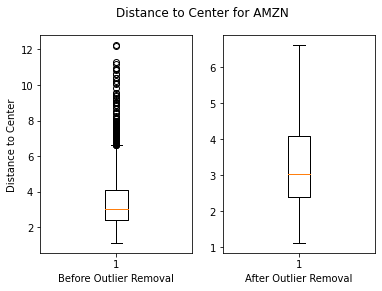

AMZN has 312 outliers out of 2417 points (12.91%)


RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  57.180471  54.590594    0.020101  7.570633e+05  1.944717  0.997556   
1  43.826993  45.634446    0.025741 -8.958059e+05  2.545792  1.006006   
2  60.405393  56.783113    0.024644  1.271881e+06  2.277438  0.992757   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.985840  0.946338  0.101003  -36.120896  0.009761  0.007556  0.031794   
1  1.022967  1.000663  0.460679  -68.039121 -0.009667 -0.013512 -0.032516   
2  0.974854  0.915583  0.421614  -27.520610  0.014261  0.018004  0.051968   

    ROC_100  ClusterCoverage%  
0  0.129296          0.486936  
1  0.060301          0.152494  
2  0.197983          0.360570

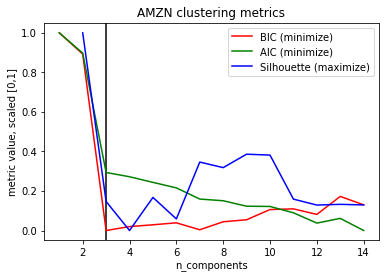

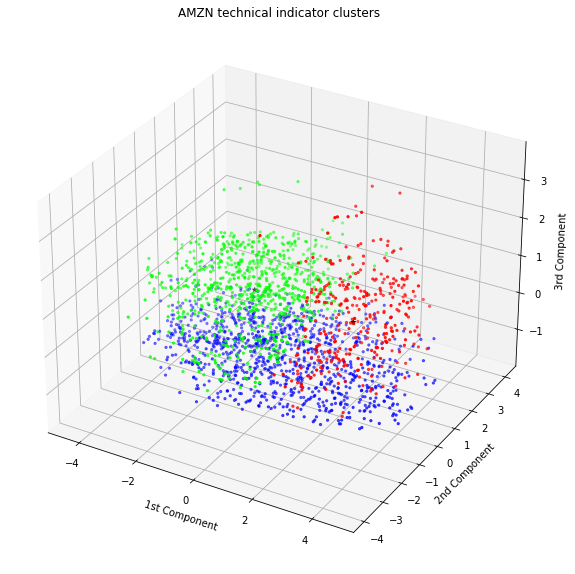

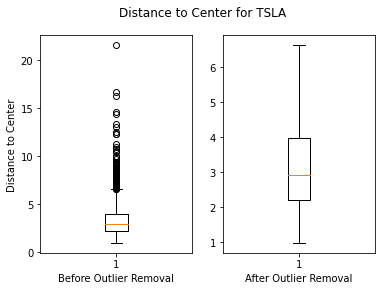

TSLA has 333 outliers out of 2417 points (13.78%)


RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  41.434594  43.890393    0.042402 -7.966773e+06  4.167846  1.018641   
1  66.746687  60.362022    0.039963  1.769839e+07  3.693129  0.977863   
2  54.427607  49.099653    0.041810 -1.154621e+06  4.081717  1.008234   
3  54.670534  55.498145    0.040493  1.137366e+07  3.774571  0.987839   
4  54.667887  48.893012    0.043682 -5.362447e+06  4.071610  0.991773   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.053863  1.042822  0.097009  -74.031252 -0.017462 -0.040936 -0.068484   
1  0.921843  0.834346  0.071036  -12.590892  0.038868  0.057197  0.156389   
2  0.992236  0.880098  0.079190  -51.401943  0.029483 -0.013226  0.075681   
3  0.979351  0.983864  0.079644  -33.783529 -0.004358  0.030826  0.023003   
4  0.977649  0.971779  0.668006  -44.431328  0.010991  0.019486  0.050550   

    ROC_100  ClusterCoverage%  
0  0.076722          0.250480  
1  0.472243          0.168906  
2  0.482531          0.124760  
3  0.102693          0.336372  
4  0.044922          0.119482

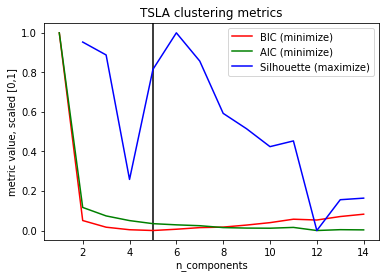

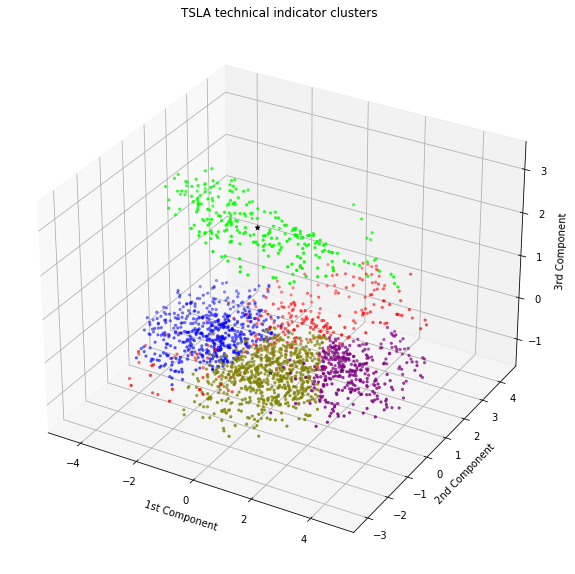

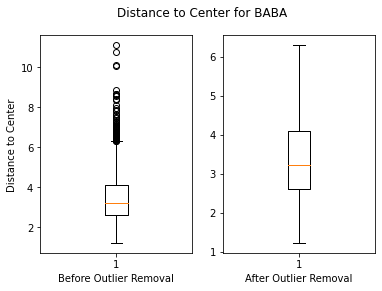

BABA has 244 outliers out of 1702 points (14.34%)


RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  42.231450  41.597930    0.021905 -8.229078e+06  2.531118  1.013534   
1  58.984921  54.220180    0.019383  2.543425e+06  2.285265  0.991187   
2  43.342329  45.411311    0.034461 -3.565832e+06  3.091057  1.008776   
3  61.883190  56.793861    0.026681  6.680102e+06  2.450263  0.996508   
4  55.338866  56.776925    0.038139  5.943584e+06  3.268420  0.983134   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.031119  1.059590  1.229778  -72.360875 -0.007715 -0.028599 -0.037053   
1  0.969558  0.972502  1.270223  -27.088194  0.015946  0.021231  0.059299   
2  1.027382  1.037908  0.415129  -66.070984 -0.013615 -0.018053 -0.042002   
3  0.969364  0.881972  0.410140  -27.949091  0.026418  0.011455  0.076417   
4  0.975909  1.017118  0.364349  -24.366866 -0.007927  0.037529  0.016703   

    ROC_100  ClusterCoverage%  
0 -0.071965          0.096708  
1  0.022546          0.199588  
2  0.013470          0.288066  
3  0.244239          0.291495  
4 -0.000450          0.124143

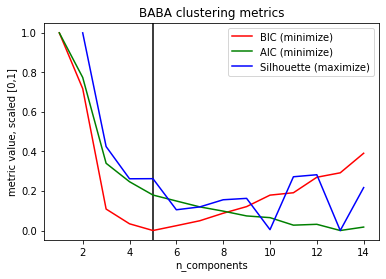

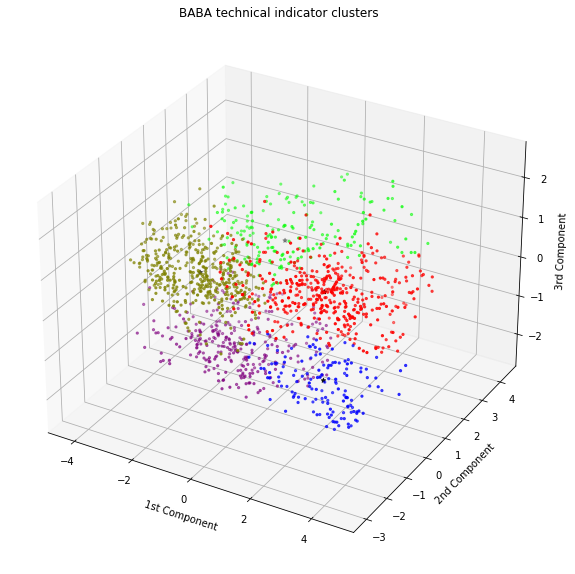

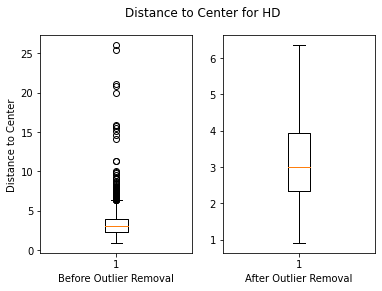

HD has 303 outliers out of 2417 points (12.54%)


RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  63.707556  5.987553    0.018247 -1.858641e+08   8.986515  0.991540   
1  56.650354 -0.320246    0.015532 -5.272946e+08  18.849843  0.998565   
2  47.215092  1.537787    0.017640 -1.843992e+08   9.477170  1.004134   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.973336  0.934214  0.231957 -134.288183  0.013198  0.019995  0.049127   
1  0.990908  0.950322  0.512616 -323.642316  0.007795  0.004398  0.023039   
2  1.010564  0.986973  0.240867 -199.983893 -0.002907 -0.008667 -0.013057   

    ROC_100  ClusterCoverage%  
0  0.123124          0.331599  
1  0.115182          0.397351  
2  0.063240          0.271050

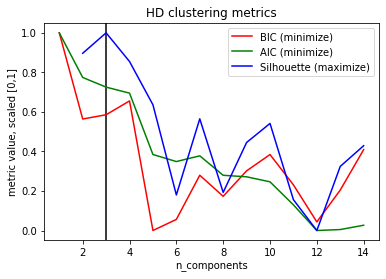

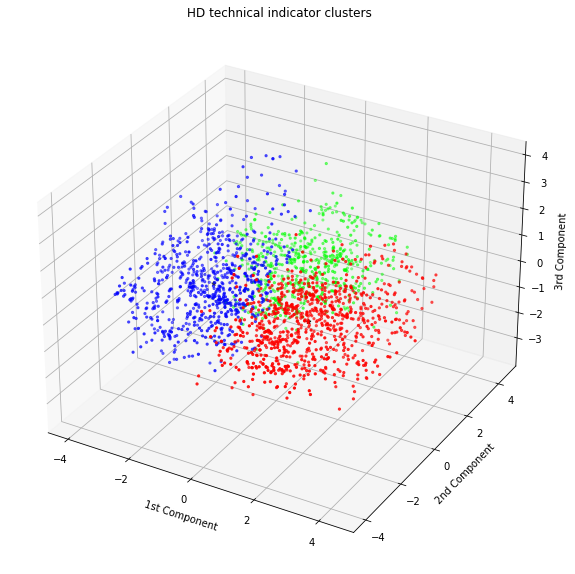

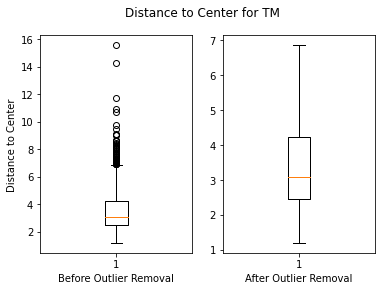

TM has 302 outliers out of 2417 points (12.49%)


RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  40.594051  39.267927    0.017654 -2.519197e+04   1.424550  1.006613   
1  53.612757  21.876806    0.019309 -1.273932e+07   5.450820  0.991207   
2  54.193942  49.588302    0.014988  3.698080e+05   1.115825  1.002157   
3  44.258948 -15.412248    0.018949 -2.754598e+07  10.354990  1.002674   
4  67.475112  37.623667    0.013705 -9.839477e+06   4.279537  0.995098   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.022121  1.037717  0.483274  -78.000102 -0.010216 -0.015117 -0.035639   
1  0.989997  1.003329  0.550895 -105.424559 -0.004481  0.017995  0.003478   
2  0.995742  0.966272  0.447865  -45.178880  0.007944 -0.002958  0.018503   
3  1.011420  1.017454  0.631018 -230.394309 -0.005739 -0.006509 -0.018210   
4  0.967734  0.901921  0.478150  -72.003565  0.023591  0.014152  0.070097   

    ROC_100  ClusterCoverage%  
0 -0.037417          0.122459  
1 -0.001134          0.054846  
2  0.074285          0.266194  
3  0.004532          0.085579  
4  0.175071          0.014657

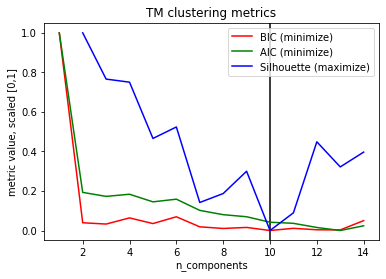

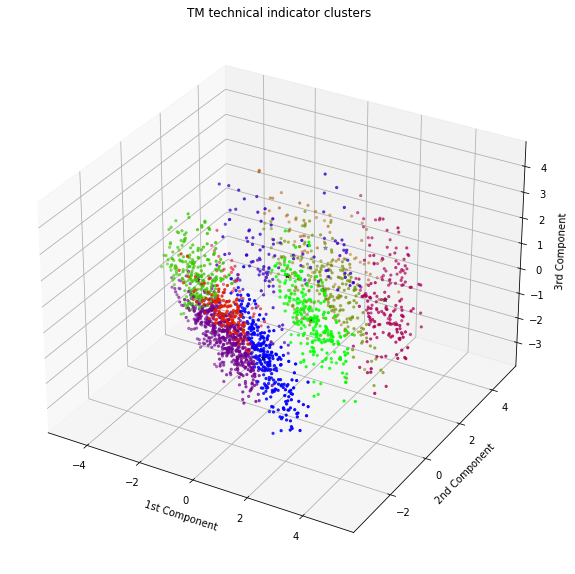

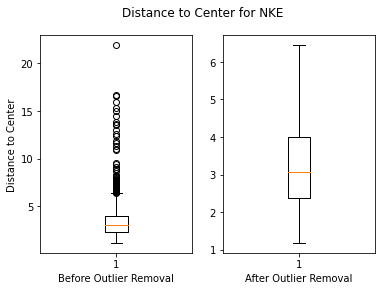

NKE has 301 outliers out of 2417 points (12.45%)


RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  56.267743   2.095192    0.018035 -2.484768e+08   8.052339  0.998000   
1  59.749629  -6.452616    0.016498 -4.087437e+08  12.125154  0.991534   
2  63.475402  11.463327    0.019610 -1.505239e+08   5.623372  0.992118   
3  47.403695   4.028576    0.022494 -1.976813e+08   6.634668  0.996553   
4  50.170828  12.532947    0.023485 -7.714133e+07   3.615260  0.997121   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.989217  0.953123  0.574173 -149.206783  0.008381  0.005805  0.026151   
1  0.978038  0.961146  0.907111 -207.401414  0.009091  0.019574  0.037941   
2  0.971428  0.920963  0.384693  -85.971111  0.016181  0.019338  0.055599   
3  1.004856  1.018490  0.463925 -126.904563 -0.009250  0.006102 -0.017218   
4  1.000049  0.991386  0.220779  -70.345587 -0.003787  0.005703 -0.003857   

    ROC_100  ClusterCoverage%  
0  0.106265          0.162571  
1  0.068984          0.052930  
2  0.151439          0.086011  
3 -0.008102          0.172023  
4  0.045561          0.108223

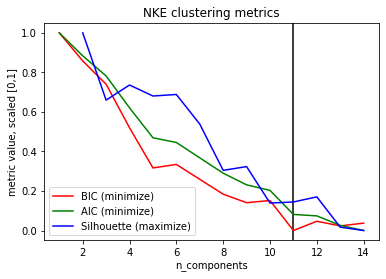

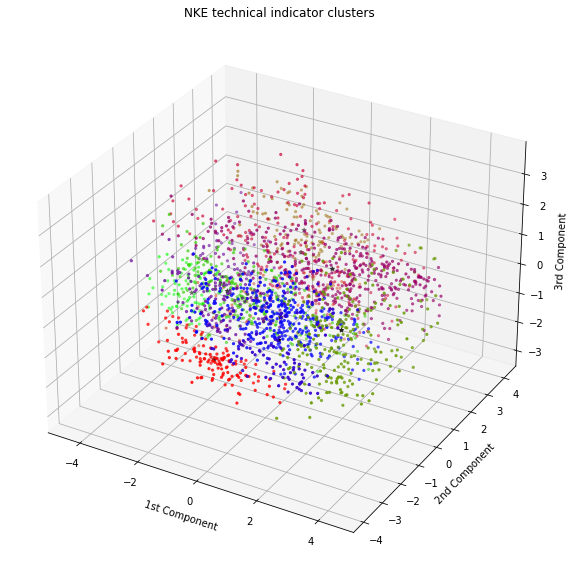

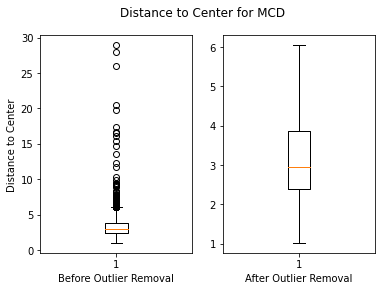

MCD has 307 outliers out of 2417 points (12.7%)


RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  47.186733  2.588815    0.016182 -6.127068e+07   5.133948  1.000401   
1  56.221036 -0.095299    0.011792 -7.234432e+08  24.670409  0.997322   
2  65.074357  2.694519    0.011960 -3.980531e+08  15.093582  0.995842   
3  60.730671  4.469152    0.014457  2.032827e+07   2.762048  0.997874   
4  43.665190 -2.604641    0.012642 -8.151755e+08  27.435434  1.003320   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.005652  1.004813  0.437329 -112.357798 -0.004155 -0.001160 -0.011172   
1  0.991433  0.981801  1.143612 -501.728530  0.004302  0.006396  0.016177   
2  0.980032  0.931134  0.778976 -310.054270  0.013456  0.010931  0.041670   
3  0.987446  0.937396  0.329369  -66.422900  0.009839  0.006224  0.028642   
4  1.011246  1.026823  1.246611 -576.441542 -0.005319 -0.007704 -0.018325   

    ROC_100  ClusterCoverage%  
0  0.015220          0.124645  
1  0.032076          0.217062  
2  0.127402          0.101896  
3  0.132300          0.061137  
4 -0.031750          0.077251

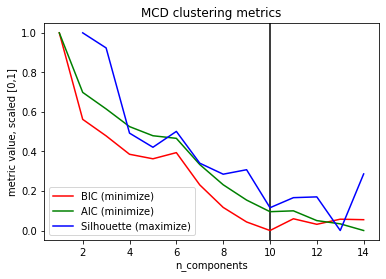

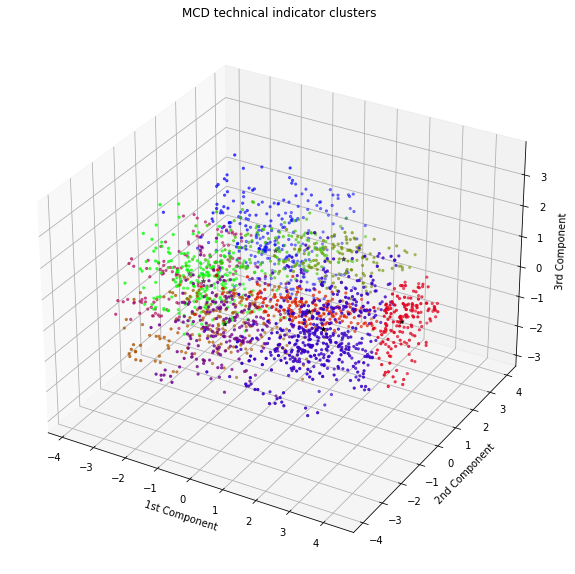

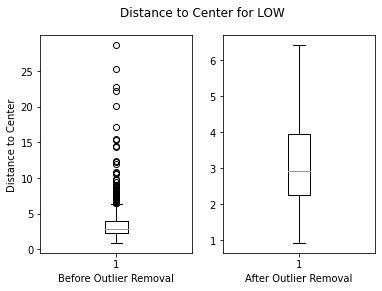

LOW has 308 outliers out of 2417 points (12.74%)


RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  44.799507 -0.512485    0.021138 -2.220943e+08  10.689827  1.003811   
1  59.584464  0.720138    0.018879 -3.710182e+08  14.416846  0.997216   
2  59.432448  8.784341    0.020818 -8.923808e+07   5.973229  0.994387   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.017026  1.014697  0.366735 -194.809235 -0.009631 -0.009002 -0.028915   
1  0.981550  0.926468  0.515213 -221.213539  0.015254  0.008327  0.045792   
2  0.978755  0.939601  0.203503  -88.548718  0.011973  0.014295  0.043216   

    ROC_100  ClusterCoverage%  
0  0.027417          0.308203  
1  0.155046          0.335704  
2  0.118734          0.356093

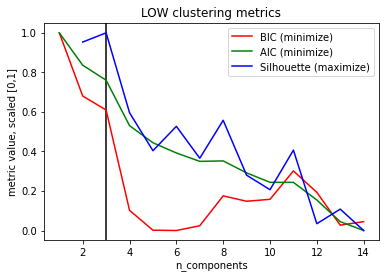

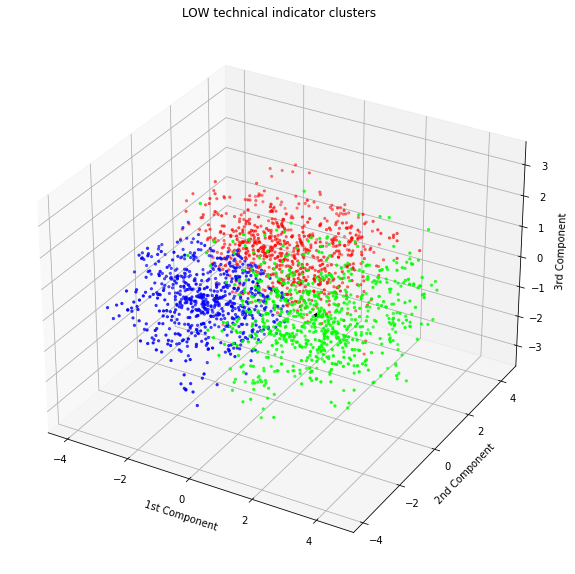

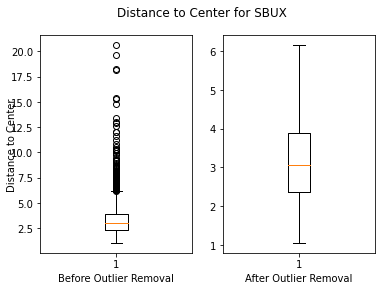

SBUX has 328 outliers out of 2417 points (13.57%)


RSI  Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  47.857195  0.306366    0.017966 -4.328725e+08  11.622185  1.000210   
1  60.974987  1.086810    0.017210 -5.362160e+08  14.272572  0.996781   
2  57.249910  6.023755    0.017779 -1.523975e+08   5.430126  0.997721   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.005625  1.007557  0.481036 -213.067110 -0.004734 -0.000814 -0.011459   
1  0.980500  0.926344  0.586235 -231.699215  0.015564  0.009066  0.046166   
2  0.988329  0.944251  0.246204  -97.166266  0.008367  0.006663  0.026559   

    ROC_100  ClusterCoverage%  
0  0.004444          0.415989  
1  0.158135          0.287697  
2  0.128224          0.296314

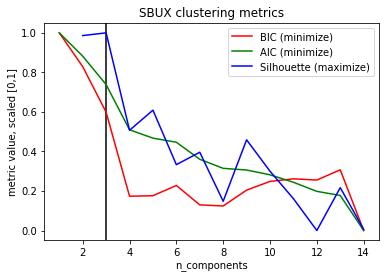

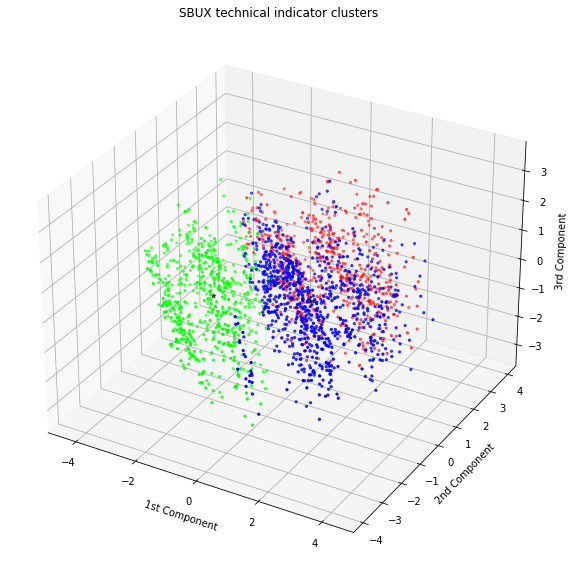

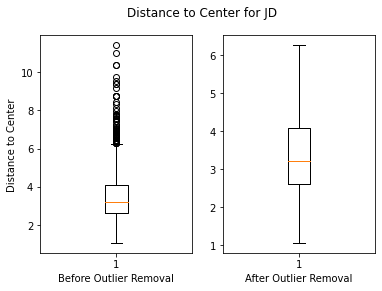

JD has 259 outliers out of 1785 points (14.51%)


RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  43.176508  46.338464    0.039919 -2.432977e+06  4.070821  1.006349   
1  59.197079  50.062458    0.026117 -1.085450e+06  3.131584  0.998138   
2  55.901346  53.350223    0.034761  3.577036e+06  3.376864  1.005814   
3  60.597270  57.377730    0.039135  4.285812e+06  3.632492  0.978507   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.030151  1.068880  0.751169  -65.012487 -0.018514 -0.014464 -0.050911   
1  0.972741  0.919735  1.361590  -39.509018  0.027226  0.007454  0.077812   
2  0.989612  0.872988  0.373357  -48.227507  0.020840 -0.006701  0.050786   
3  0.953706  0.952110  0.897269  -19.201106  0.008307  0.049485  0.062731   

    ROC_100  ClusterCoverage%  
0 -0.027124          0.356488  
1  0.132493          0.256881  
2  0.330216          0.178244  
3  0.094794          0.208388

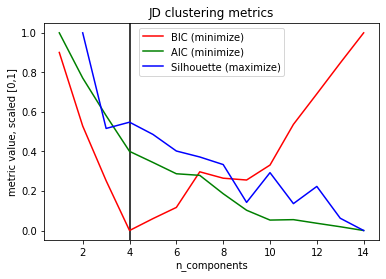

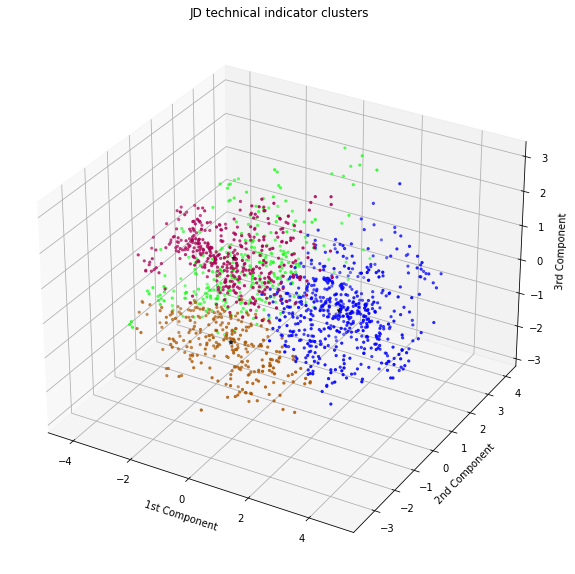

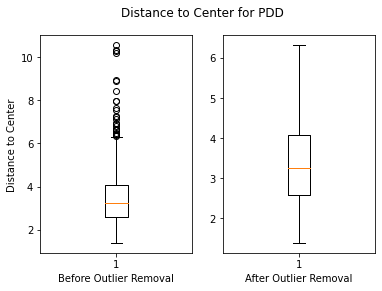

PDD has 95 outliers out of 733 points (12.96%)


RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  54.492719  53.576144    0.046228  1.525089e+06  4.840081  0.985243   
1  60.676587  49.239952    0.060037 -2.677954e+05  5.684100  0.997620   
2  41.406647  44.696006    0.050422 -2.449969e+06  5.634010  1.016963   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.968061  0.999829  0.511107  -35.325504  0.002966  0.037827  0.054534   
1  0.944246  0.699471  0.203332  -39.988140  0.059653  0.016065  0.190210   
2  1.061513  1.106813  0.372593  -72.871566 -0.031370 -0.036180 -0.097612   

    ROC_100  ClusterCoverage%  
0  0.077584          0.402821  
1  0.985617          0.283699  
2  0.085962          0.313480

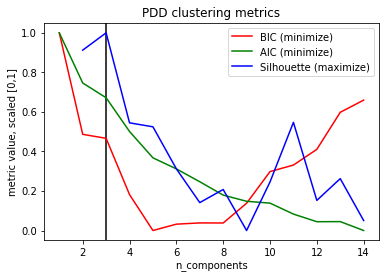

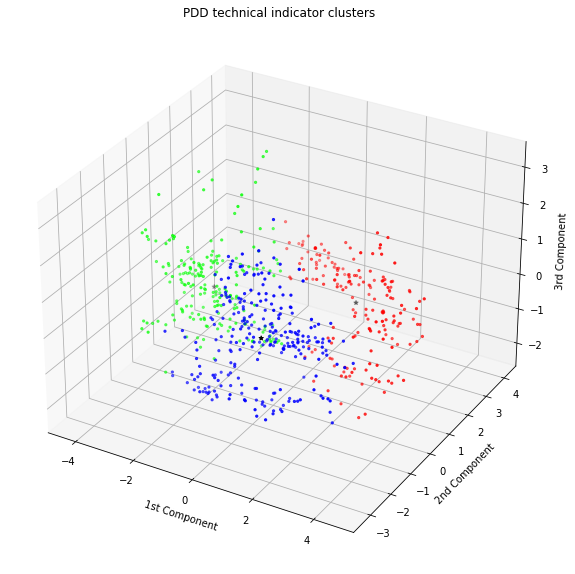

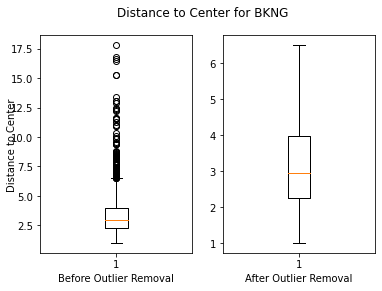

BKNG has 306 outliers out of 2417 points (12.66%)


RSI   Ultimate  BandRadius        Chaikin      NATR     SMA_5  \
0  46.199395  47.581525    0.025613  -73874.980344  2.334024  1.001375   
1  62.419563  56.707987    0.020044  147318.287757  1.965730  0.991483   
2  46.649296  42.267799    0.022543 -253454.200042  2.168374  1.014374   
3  59.054054  55.626632    0.022343  133381.712591  2.099755  0.991913   
4  47.218893  48.281841    0.023511  -68049.673312  2.225990  0.999656   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.014063  1.010860  0.363771  -57.309686 -0.009911 -0.004360 -0.026279   
1  0.969527  0.928376  0.212714  -20.941577  0.015386  0.021672  0.056079   
2  1.019411  0.970505  0.308329  -73.239669  0.010555 -0.030461  0.005112   
3  0.977714  0.948614  0.303195  -26.943920  0.007977  0.019612  0.036024   
4  1.011352  1.012697  0.224663  -52.289170 -0.010604 -0.000664 -0.025006   

    ROC_100  ClusterCoverage%  
0  0.016714          0.126954  
1  0.129588          0.156798  
2  0.098248          0.088584  
3  0.104155          0.212695  
4 -0.001840          0.243960

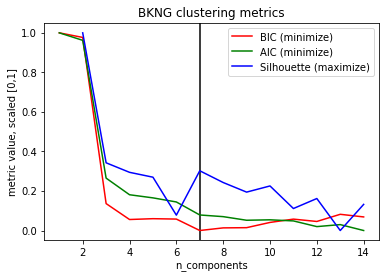

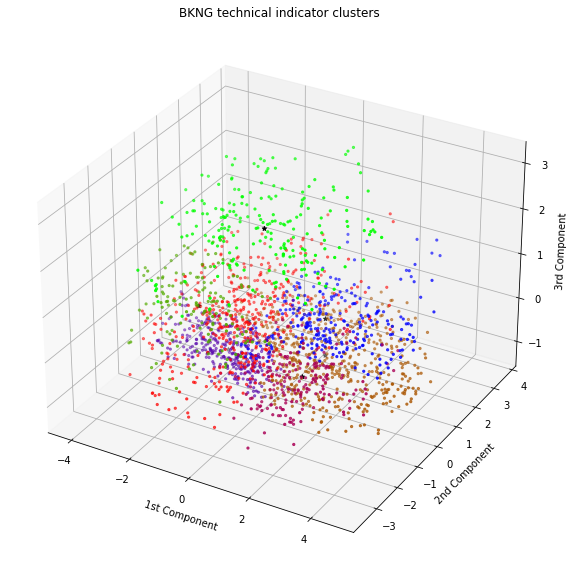

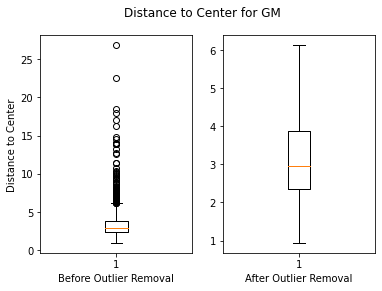

GM has 304 outliers out of 2417 points (12.58%)


RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  49.752817  13.215484    0.026454 -1.967868e+08   7.752556  1.001323   
1  52.008340  -0.508848    0.023513 -9.982636e+08  24.449615  0.998624   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.003887  0.992967  0.585998 -104.019524 -0.000904 -0.002032 -0.000108   
1  0.995714  0.983116  0.757366 -276.462047  0.002400  0.004316  0.012106   

    ROC_100  ClusterCoverage%  
0  0.051297          0.371983  
1  0.054374          0.628017

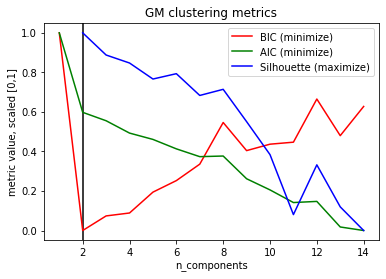

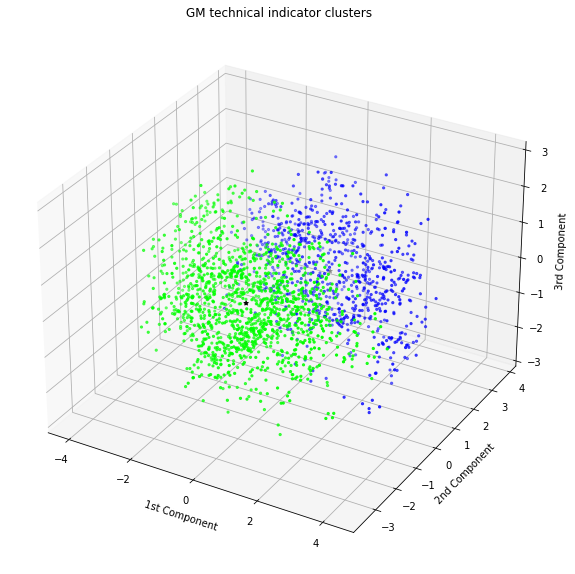

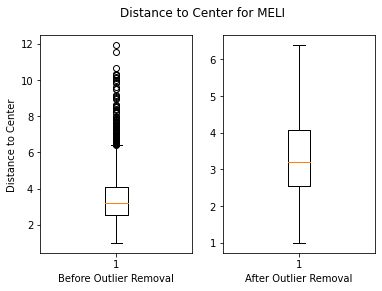

MELI has 322 outliers out of 2417 points (13.32%)


RSI   Ultimate  BandRadius       Chaikin      NATR     SMA_5  \
0  45.722663  16.264590    0.033501 -2.186690e+06  4.155072  0.996463   
1  55.594914  48.572264    0.034147  1.323477e+05  3.439744  1.010057   
2  39.191684  41.297551    0.043061 -1.764563e+05  4.176874  1.012832   
3  45.913739  20.835455    0.031653 -1.629341e+06  3.850819  1.014274   
4  59.516026   4.605450    0.021714 -3.248495e+06  3.664878  0.987057   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.017796  1.091747  0.787218  -69.382958 -0.024204  0.005133 -0.050071   
1  0.994474  0.858572  0.094600  -51.319958  0.024527 -0.014926  0.057787   
2  1.051925  1.052896  0.160260  -75.121097 -0.032013 -0.026868 -0.093800   
3  1.031184  0.991164  0.569117  -79.897346 -0.004596 -0.030048 -0.028938   
4  0.964426  0.988640  1.128385  -53.703956  0.016830  0.027204  0.069682   

    ROC_100  ClusterCoverage%  
0 -0.128414          0.105012  
1  0.395068          0.077327  
2  0.087461          0.128878  
3  0.123891          0.155131  
4 -0.051728          0.063484

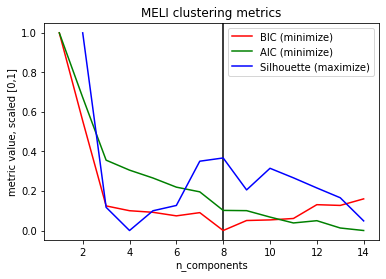

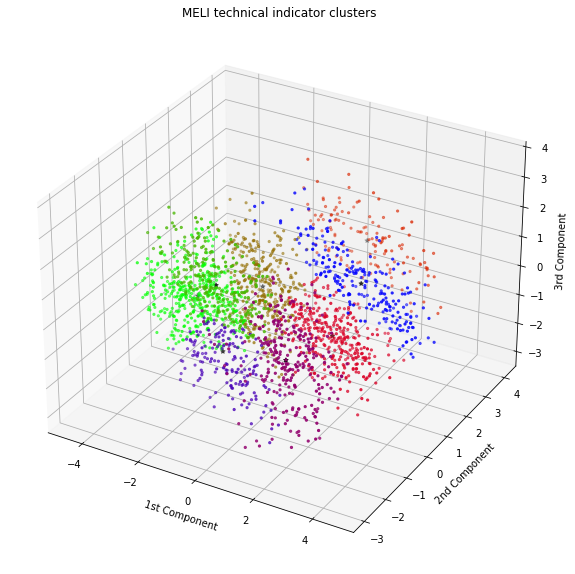

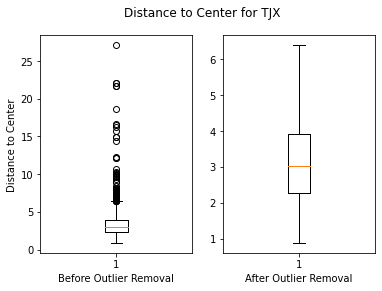

TJX has 260 outliers out of 2417 points (10.76%)


RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  53.915597   6.277806    0.019056 -8.637862e+07   4.650806  1.003339   
1  43.403157   1.000490    0.020086 -2.341660e+08   8.035709  1.004208   
2  54.767274   3.406720    0.018185 -2.460236e+08   8.455855  0.997436   
3  54.192651  -4.365861    0.014694 -4.246244e+08  12.926565  1.002584   
4  59.147530  12.711095    0.021237 -3.666087e+07   3.297038  0.991049   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.997309  0.948755  0.287123 -105.871071  0.009160 -0.005398  0.019538   
1  1.016896  1.023854  0.440114 -178.916752 -0.009584 -0.009376 -0.030172   
2  0.991721  0.967060  0.454589 -159.872069  0.004724  0.006254  0.016992   
3  0.996699  0.952813  0.644529 -257.126975  0.008808 -0.004091  0.019394   
4  0.979013  0.957944  0.233056  -43.644603  0.006484  0.019838  0.031553   

    ROC_100  ClusterCoverage%  
0  0.118790          0.126101  
1 -0.023744          0.100139  
2  0.075697          0.215114  
3  0.121511          0.130274  
4  0.072744          0.140009

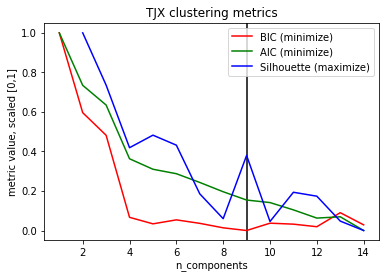

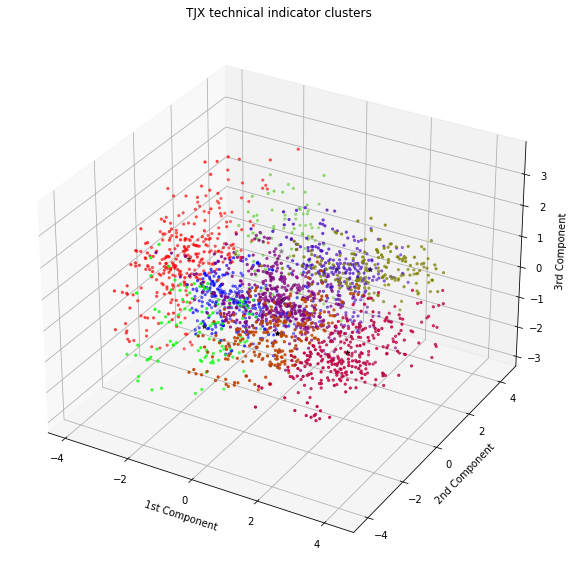

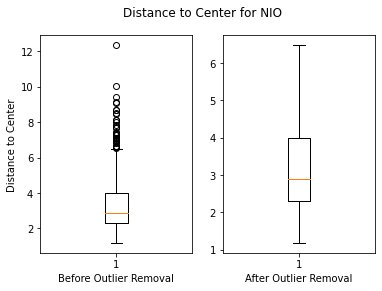

NIO has 109 outliers out of 700 points (15.57%)


RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  54.526136  51.821752    0.085954  9.756593e+06   8.280046  0.982093   
1  44.779597  45.053815    0.097628 -1.017386e+07  10.322450  1.022068   
2  59.122616  54.775953    0.074128  4.287594e+07   7.722814  1.016057   
3  51.888835  51.149424    0.049445  7.069647e+06   5.235932  0.982821   
4  68.550313  60.814317    0.088370  4.729324e+07   7.510872  0.953225   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.942784  1.060476  3.631550  -40.408576  0.019004  0.056744  0.170653   
1  1.033294  1.191071  5.086950  -67.458669 -0.008284 -0.028978  0.044281   
2  0.959664  0.551941 -0.188995  -46.910205  0.085241 -0.017113  0.264918   
3  0.983344  1.040271  0.244933  -41.503604 -0.013671  0.038401  0.012270   
4  0.829659  0.708162  2.262869  -13.344008  0.095581  0.127496  0.436417   

    ROC_100  ClusterCoverage%  
0  0.273263          0.159052  
1  0.021215          0.126904  
2  2.475949          0.179357  
3  0.487126          0.230118  
4  1.389631          0.077834

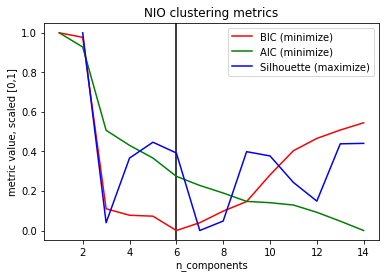

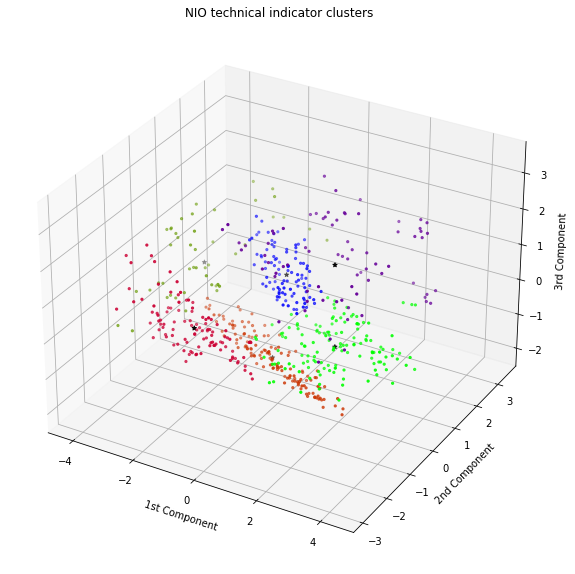

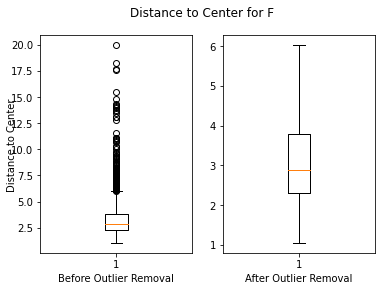

F has 369 outliers out of 2417 points (15.27%)


RSI   Ultimate  BandRadius       Chaikin       NATR     SMA_5  \
0  48.367584  -2.971425    0.020118 -3.907747e+09  38.086668  1.003156   
1  51.617136  20.995446    0.026035 -3.073851e+07   0.584623  1.002395   
2  36.297515  -1.405842    0.023449 -2.727836e+09  27.717630  1.007354   
3  55.252505   4.295728    0.021703 -2.714357e+09  26.505613  0.993850   
4  63.192905   0.632509    0.018541 -4.033588e+09  38.458857  0.992418   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.006404  1.006216  0.857195 -446.256720 -0.001242 -0.005822 -0.005101   
1  1.001565  0.959481  1.843721  -26.476813  0.004435 -0.003802  0.011464   
2  1.037358  1.088162  1.190258 -326.773585 -0.025122 -0.018126 -0.070799   
3  0.985691  0.980939  1.152220 -297.391375  0.004194  0.014222  0.023530   
4  0.965773  0.923909  0.792596 -437.600592  0.021528  0.019837  0.068519   

    ROC_100  ClusterCoverage%  
0  0.018433          0.250977  
1  0.112847          0.123535  
2 -0.093766          0.159668  
3  0.038693          0.244629  
4  0.118267          0.111328

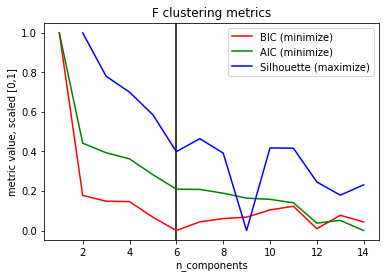

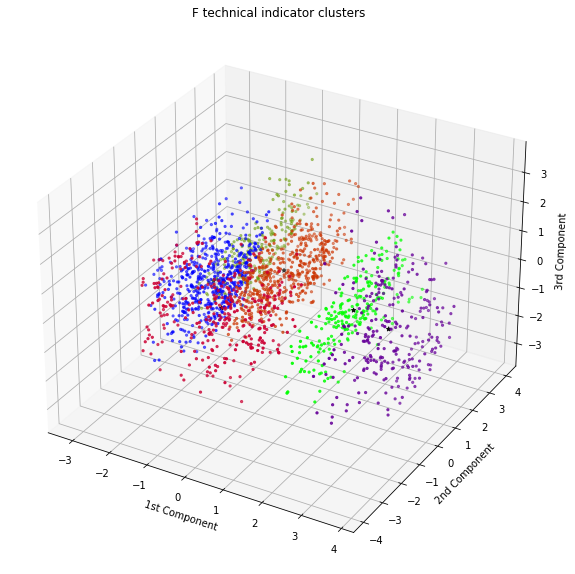

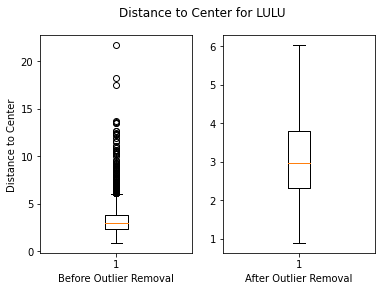

LULU has 370 outliers out of 2417 points (15.31%)


RSI   Ultimate  BandRadius        Chaikin      NATR     SMA_5  \
0  63.307084  58.251593    0.027276  859899.594317  2.802730  0.985734   
1  51.325931  48.598077    0.026343 -129724.905389  2.777061  1.007246   
2  44.930181  48.651505    0.031503 -109694.226550  3.291046  0.999382   
3  63.835249  57.928518    0.026973  873156.733051  2.601982  0.989423   
4  45.207642  48.842036    0.032333   -2975.737731  3.061393  1.002347   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.951357  0.948125  1.064462  -16.848001  0.023199  0.034772  0.091034   
1  1.003699  0.961190  0.863045  -55.796898  0.010401 -0.013481  0.019978   
2  1.005923  1.122813  1.623418  -53.868292 -0.010639  0.001449 -0.018903   
3  0.962494  0.857677  0.259343  -21.462304  0.021021  0.026907  0.076160   
4  1.022424  0.999737  0.381523  -58.628637 -0.018869 -0.005150 -0.049920   

    ROC_100  ClusterCoverage%  
0  0.063272          0.202736  
1  0.123380          0.286761  
2 -0.240449          0.090376  
3  0.321981          0.208109  
4  0.128791          0.212018

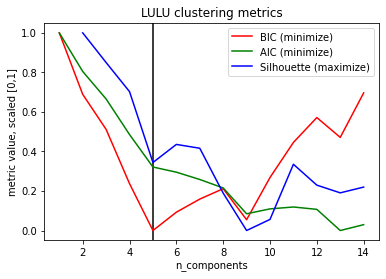

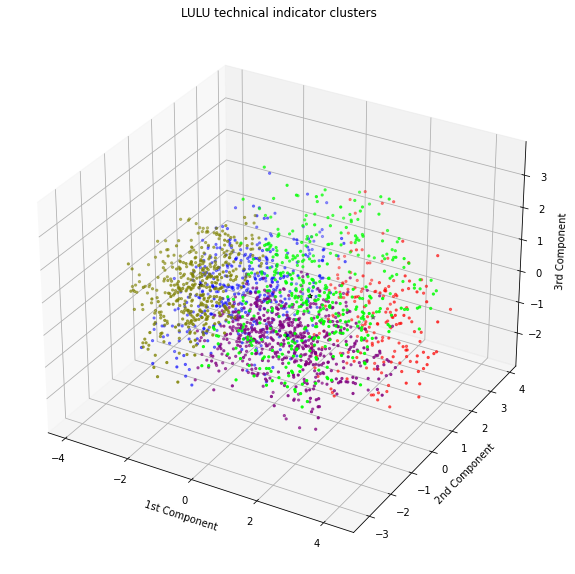

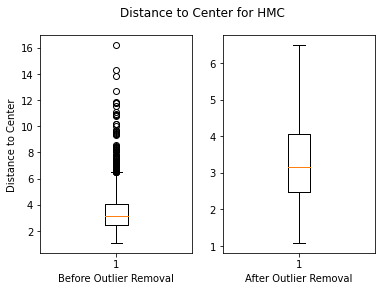

HMC has 293 outliers out of 2417 points (12.12%)


RSI   Ultimate  BandRadius        Chaikin      NATR     SMA_5  \
0  34.350872  40.190677    0.021473  -80904.874322  1.628576  1.010489   
1  59.005356  53.392956    0.015051   51073.537243  1.357325  1.003054   
2  51.628398  50.856455    0.018053   29740.707549  1.494556  1.000079   
3  43.111838  44.716226    0.022316 -235312.115823  1.694781  0.997064   
4  65.777888  64.061191    0.012674  544773.576068  1.250343  0.996107   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  1.038806  1.078928  1.391587  -87.397117 -0.019531 -0.024750 -0.063792   
1  0.983987  0.930519  1.254120  -39.508974  0.021132 -0.002435  0.050480   
2  0.997402  0.993582  1.271135  -45.640646  0.002290  0.000809  0.008064   
3  1.013571  1.059823  1.177883  -55.100836 -0.018577  0.003373 -0.039983   
4  0.965300  0.916667  1.405225  -15.454211  0.025367  0.013752  0.073638   

    ROC_100  ClusterCoverage%  
0 -0.088232          0.112524  
1  0.121833          0.062618  
2  0.020038          0.143597  
3 -0.082408          0.104991  
4  0.120822          0.050847

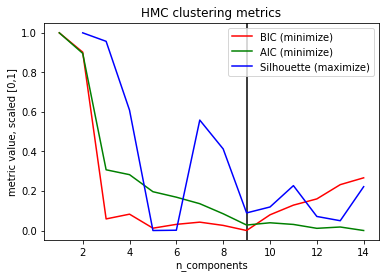

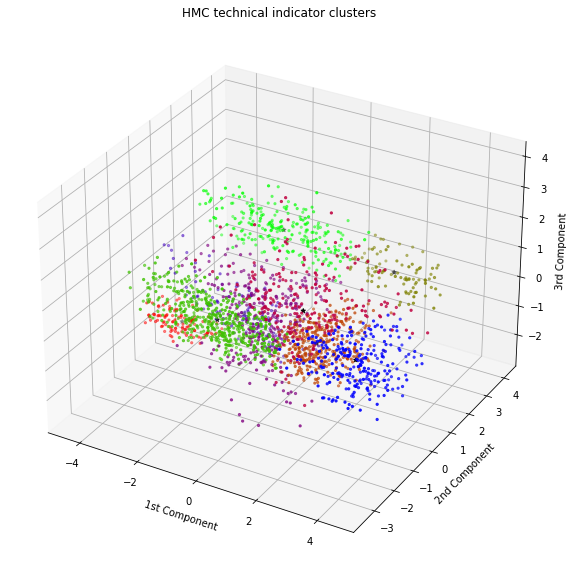

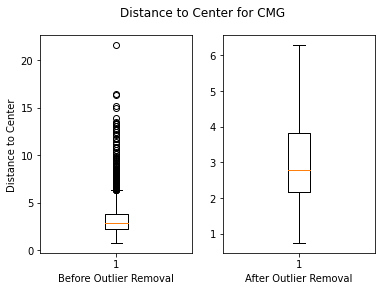

CMG has 351 outliers out of 2417 points (14.52%)


RSI   Ultimate  BandRadius        Chaikin      NATR     SMA_5  \
0  62.081818  57.094958    0.023268  218377.014820  2.221910  0.990316   
1  52.953696  54.284030    0.026647  172663.819514  2.807753  0.989148   
2  55.550882  49.697110    0.022710  -32929.212647  2.371049  1.003357   
3  43.770743  43.848852    0.025591 -239253.421358  2.440049  1.007764   

     SMA_20   SMA_100       SAR  Williams%R       APO     ROC_5    ROC_20  \
0  0.968522  0.900098  0.368839  -23.666837  0.015327  0.024016  0.058951   
1  0.979859  1.083347  0.969541  -30.133649 -0.003563  0.024179  0.016884   
2  0.988563  0.949830  0.730424  -46.471376  0.018864 -0.003783  0.049026   
3  1.026122  1.004642  0.403919  -68.522301 -0.010703 -0.017290 -0.037222   

    ROC_100  ClusterCoverage%  
0  0.226421          0.413843  
1 -0.199506          0.084705  
2  0.112228          0.170862  
3  0.086527          0.330591

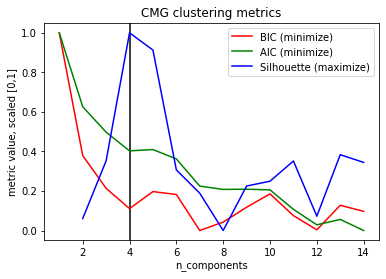

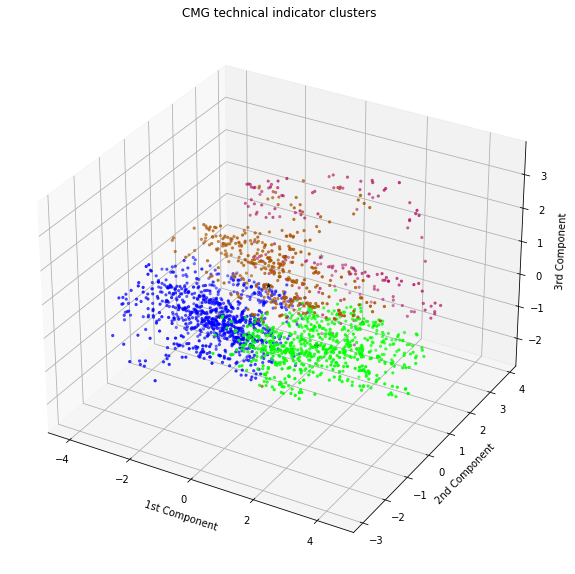

In [4]:

print("Clustering stocks using GMM")
numClusters = []

if not os.path.exists("plots"):
        os.mkdir("plots")


for i in range(len(tickers)):

    # read in data from csv
    data = pd.read_csv(f'./data/{tickers[i]}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)


    # Remove outliers
    center = np.mean(X, axis=0)
    
    distToCenter = np.linalg.norm(X-center, axis=1)

    #box plot of distance to center
#     plt = reload(plt)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Distance to Center for {tickers[i]}')
    ax1.boxplot(distToCenter)
    plt.setp(ax1, xlabel='Before Outlier Removal')
    plt.setp(ax2, xlabel='After Outlier Removal')
    ax2.boxplot(distToCenter, showfliers=False)
    fig.text(0.06, 0.5, 'Distance to Center', ha='center', va='center', rotation='vertical')
    plt.savefig(f"plots/outliers_{tickers[i]}.png")
    plt.show()



    # Calculate IQR
    q75, q25 = np.percentile(distToCenter, [75 ,25])
    
    iqr = q75 - q25

    # Calculate outlier cutoff and remove outliers
    nonOutlierIndices = np.argwhere((distToCenter < q75 + 0.5 * iqr) & (distToCenter > q25 - 1 * iqr)).reshape(-1)
    outlierPercentage = 100 * (len(X) - len(nonOutlierIndices)) / float(len(X))
    print(f'{tickers[i]} has {len(X) - len(nonOutlierIndices)} outliers out of {len(X)} points ({round(outlierPercentage, 2)}%)')
    X = X[nonOutlierIndices]


    # PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    
    # GMM
    n_components = np.arange(1, features.shape[1]+1)
    gmms = [GaussianMixture(n_components=k, covariance_type='full', n_init=10).fit(X) for k in n_components]

    
    # Calculate metrics
    silhouettes = np.array([metrics.silhouette_score(X, gmms[k-1].predict(X)) for k in n_components[1:]])
    bics = np.array([gmm.bic(X) for gmm in gmms])
    aics = np.array([gmm.aic(X) for gmm in gmms])
    
    minidx = min(np.argmin(bics), np.argmin(aics))
    argmaxSil = np.argmax(silhouettes)
    if argmaxSil > 0 and silhouettes[argmaxSil - 1] < silhouettes[argmaxSil]:
        # enforce local maximum (peak) for silhouette
        minidx = min(minidx, argmaxSil + 1)
        
    numClusters.append(minidx + 1)
    
    centroids = gmms[minidx].means_

    # descale centroids
    centroids_descaled = scaler.inverse_transform(pca.inverse_transform(centroids))

    # create df for centroids
    centroids_df = pd.DataFrame(centroids_descaled, columns=data.columns[6:])
    centroids_df['ClusterCoverage%'] = [pair[1] / X.shape[0] for pair in np.asarray(np.unique(gmms[minidx].predict(X), return_counts=True)).T]
    display(centroids_df.head())
    if not os.path.exists("centroids"):
        os.mkdir("centroids")
    centroids_df.to_csv(f'./centroids/{tickers[i]}_centroids.csv')


    # plot the results
#     plt = reload(plt)
    fig = plt.figure()
    plt.title(f"{tickers[i]} clustering metrics")
    plt.axvline(x=minidx + 1, color='black')
    plt.plot(n_components, minmax_scale(bics), label='BIC (minimize)', color='r')
    plt.plot(n_components, minmax_scale(aics), label='AIC (minimize)', color='g')
    plt.plot(n_components[1:], minmax_scale(silhouettes), label='Silhouette (maximize)', color='b')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.ylabel('metric value, scaled [0,1]')
    plt.savefig(f"plots/clustering_{tickers[i]}.png")
    plt.show()

#     plt = reload(plt)
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=5, c=gmms[minidx].predict(X), cmap='brg')
    ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black')
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    plt.title(f"{tickers[i]} technical indicator clusters")
    plt.savefig(f"plots/pca{tickers[i]}.png")
#     plt.show()

    # plt.plot(n_components[1:], silhouette_avg, label='SC')
    # plt.legend(loc='best')
    # plt.xlabel('n_components')
    # plt.ylabel('Sillhouette Score')
    # plt.show()
plt.show()

number of clusters (raw) [3, 5, 5, 3, 10, 11, 10, 3, 3, 4, 3, 7, 2, 8, 9, 6, 6, 5, 9, 4]
mean: 5.8 , rounds to 5 clusters


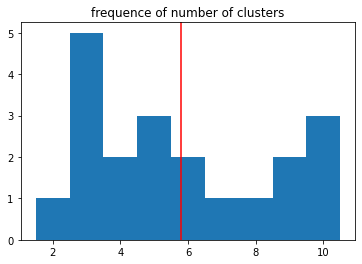

In [5]:
%matplotlib inline

print('number of clusters (raw)', numClusters)
print('mean:', np.mean(numClusters), ', rounds to', int(np.mean(numClusters)), 'clusters')

fig = plt.figure()
plt.hist(numClusters, align='left', bins=np.max(numClusters) - np.min(numClusters))
plt.axvline(x=np.mean(numClusters), c='red')
plt.xlabel="num clusters"
plt.ylabel='freq'
plt.title('frequence of number of clusters')
plt.show()